# Needleman-Wunsch算法 
基于最长公共子串（Longest Common Subsequence）的文本比较算法

## 最长公共子串

全局序列比对：尝试找到两个完整的序列 S1 和 S2 之间的最佳比对

对于1≤i≤N，1≤j≤M，有公式一
> 若ai=bj，则H(i,j)=H(i-1,j-1) + match_award

> 若ai≠bj，则H(i,j)=Max(H(i-1,j-1)+mismatch_penalty,H(i-1,j)+gap_penalty,H(i,j-1)+gap_penalty)

## 算法原理 
假设
> 匹配：+1

> 错配：-1

> 错位：-1

### 初始化得分矩阵

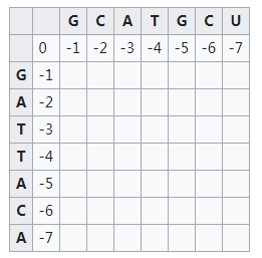

In [2]:
from IPython.display import Image
Image(filename="C:/Users/zuo_tianyu0101/Desktop/1.jpg",width=300,height=400)

### 利用公式一，计算矩阵的第一行 

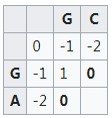

In [5]:
from IPython.display import Image
Image(filename="C:/Users/zuo_tianyu0101/Desktop/1.jpg",width=150,height=200)

## 回溯 

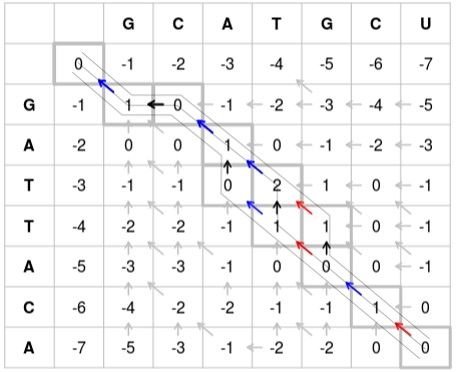

In [6]:
from IPython.display import Image
Image(filename="C:/Users/zuo_tianyu0101/Desktop/1.jpg",width=600,height=800)

## 实际情况
错位惩罚 > 不匹配 

In [11]:
# 部分实现代码
import numpy as np

match_award = 1
mismatch_penalty = -1
gap_penalty = -2

def match_score(alpha, beta):
    if alpha == beta:
        return match_award
    else:
        return mismatch_penalty

def Needleman_Wunsch(seq1, seq2):
    m, n = len(seq1), len(seq2)
    
    score = np.zeros((m + 1, n + 1))  

    # Calculate DP table
    for i in range(0, m + 1):
        score[i][0] = i * gap_penalty
    for j in range(0, n + 1):
        score[0][j] = j * gap_penalty
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = score[i - 1][j - 1] + match_score(seq1[i - 1], seq2[j - 1])
            delete = score[i - 1][j] + gap_penalty
            insert = score[i][j - 1] + gap_penalty
            score[i][j] = max(match, delete, insert)

    # Traceback and compute the alignment
    align1, align2 = '', ''
    i, j = m, n  
    while i > 0 and j > 0: 
        score_current = score[i][j]
        score_diagonal = score[i - 1][j - 1]
        score_up = score[i][j - 1]
        score_left = score[i - 1][j]

        if score_current == score_diagonal + match_score(seq1[i - 1], seq2[j - 1]):
            align1 += seq1[i - 1]
            align2 += seq2[j - 1]
            i -= 1
            j -= 1
        elif score_current == score_left + gap_penalty:
            align1 += seq1[i - 1]
            align2 += '-'
            i -= 1
        elif score_current == score_up + gap_penalty:
            align1 += '-'
            align2 += seq2[j - 1]
            j -= 1

    # Finish tracing up to the top left cell
    while i > 0:
        align1 += seq1[i - 1]
        align2 += '-'
        i -= 1
    while j > 0:
        align1 += '-'
        align2 += seq2[j - 1]
        j -= 1

    finalize(align1, align2)

# Smith-Waterman 算法 

局部序列比对：不必对两个完整的序列进行比对，可以在每个序列中使用某些部分来获得最大得分

## 算法原理 

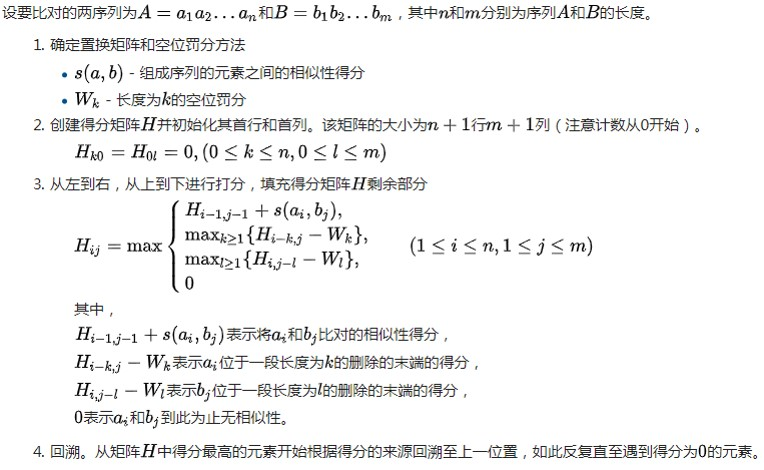

In [3]:
from IPython.display import Image
Image(filename="C:/Users/zuo_tianyu0101/Desktop/1.jpg",width=750,height=900)

### 置换矩阵
表示每一碱基对或残基对匹配或错配的分数

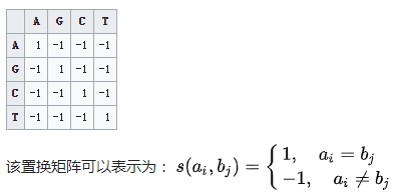

In [7]:
from IPython.display import Image
Image(filename="C:/Users/zuo_tianyu0101/Desktop/1.jpg",width=500,height=700)

### 空位罚分
当碱基对或残基对之间匹配会导致更低分数时，需要空位的引入，即让碱基或残基与空位匹配

在生物学上
> 两序列之间一般存在着具有不同相似度的区域

> 单个基因突变事件可能导致一长串空位的插入

因此，一个连续的较长的空位优于多个分散的小的空位

引出概念
> 空位起始罚分

> 空位延长罚分

空位起始罚分通常高于空位延长罚分，有效避免多个小的空位

## 示例 

以序列TGTTACGG和GGTTGACTA为例。使用如下参数

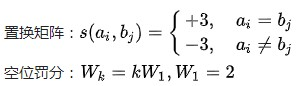

In [15]:
from IPython.display import Image
Image(filename="C:/Users/zuo_tianyu0101/Desktop/1.jpg",width=400,height=600)

初始化得分矩阵，并进行打分。如下图所示
> 黄色代表当前正在考虑的两个碱基

> 红色代表该位置得分的来源

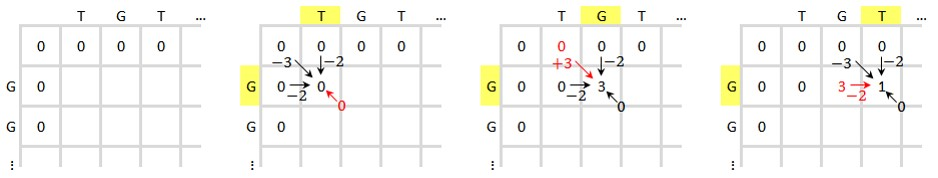

In [16]:
from IPython.display import Image
Image(filename="C:/Users/zuo_tianyu0101/Desktop/1.jpg",width=900,height=1200)

打分完成后的得分矩阵如左下图所示，其中蓝色代表最高分元素

注意某些元素有不止一种得分来源，这样在回溯过程中会产生多个路径

如果有多个相同的最高分，则应当考虑每个最高分的回溯

回溯过程见右下图

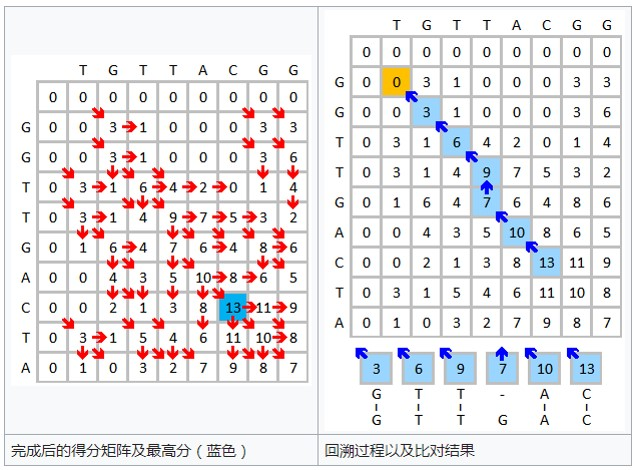

In [19]:
from IPython.display import Image
Image(filename="C:/Users/zuo_tianyu0101/Desktop/1.jpg",width=800,height=1000)

最优匹配

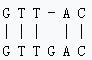

In [22]:
from IPython.display import Image
Image(filename="C:/Users/zuo_tianyu0101/Desktop/1.jpg",width=100,height=150)

## Smith-Waterman 算法与 Needleman-Wunsch 算法的区别
> 在初始化阶段，第一行和第一列全填充为 0（而且第一行和第一列的指针均为空）

> 在填充表格时，如果某个得分为负，那么就用 0 代替，只对得分为正的单元格添加返回指针

> 在回溯的时候，从得分最高的单元格开始，回溯到得分为 0 的单元格为止

## Python实现 

### 最简单版
不考虑空位起始罚分和空位延长罚分 

In [13]:
import numpy as np

match_award = 1
mismatch_penalty = -1
gap_penalty = -2

def match_score(alpha, beta):
    if alpha == beta:
        return match_award
    else:
        return mismatch_penalty
    
def Smith_Waterman(seq1, seq2):
    m, n = len(seq1), len(seq2)  

    score = np.zeros((m + 1, n + 1))  
    pointer = np.zeros((m + 1, n + 1))  

    max_score = 0  
    max_i, max_j = 0,0

    # Calculate DP table and mark pointers
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            score_diagonal = score[i - 1][j - 1] + match_score(seq1[i - 1], seq2[j - 1])
            score_up = score[i][j - 1] + gap_penalty
            score_left = score[i - 1][j] + gap_penalty
            score[i][j] = max(0, score_left, score_up, score_diagonal)
            if score[i][j] == 0:
                pointer[i][j] = 0  # 0 means end of the path
            if score[i][j] == score_left:
                pointer[i][j] = 1  # 1 means trace up
            if score[i][j] == score_up:
                pointer[i][j] = 2  # 2 means trace left
            if score[i][j] == score_diagonal:
                pointer[i][j] = 3  # 3 means trace diagonal
            if score[i][j] >= max_score:
                max_i = i
                max_j = j
                max_score = score[i][j]

    align1, align2 = '', ''  
    i, j = max_i, max_j  

    # traceback, follow pointers
    while pointer[i][j] != 0:
        if pointer[i][j] == 3:
            align1 += seq1[i - 1]
            align2 += seq2[j - 1]
            i -= 1
            j -= 1
        elif pointer[i][j] == 2:
            align1 += '-'
            align2 += seq2[j - 1]
            j -= 1
        elif pointer[i][j] == 1:
            align1 += seq1[i - 1]
            align2 += '-'
            i -= 1